In [1]:
%cd C:\\Users\\debie\\Documents\\anaconda_space

C:\Users\debie\Documents\anaconda_space


# Building A Handwritten Digits Classifier

In this project, we'll build a handwritten digits classifier. To do that, we'll use datasets that contain thousands of image of handwritten digits through 0 to 9 and train several algorithms.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploring the dataset

The first dataset that will be used is the handwritten digits dataset that is available in Scikit-learn library.

Let's explore this dataset a little to see what it contains.

In [3]:
from sklearn.datasets import load_digits

brut = load_digits(return_X_y = True, as_frame = True)
data = pd.DataFrame(brut[0])
target = pd.Series(brut[1])

data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


This dataset contains 1797 rows, which means that there are 1797 images of handwritten digits in it. There are 64 columns with a value between 0 and 16. Each column represents a pixel of the image, each image has a size of 8x8. If the value of a column is 0 then the pixel is white, and the more the value increase from 0 to 16, the darker the pixel is, 16 being totally black.

Let's plot some of the images.

In [4]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

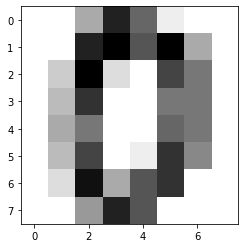

In [5]:
plt.imshow(np_image, cmap='gray_r')

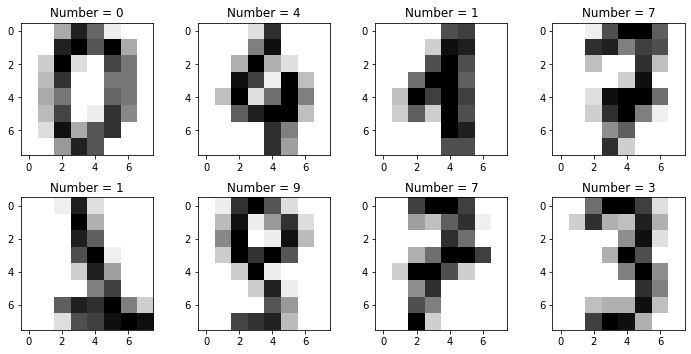

In [6]:
fig, ax = plt.subplots(2, 4, figsize=(10,5))
fig.tight_layout()
row = [0,100,200,300,1000,1100,1200,1300]

for i, ax in enumerate(ax.flat):
    image = data.iloc[row[i]]
    np_image = image.values
    np_image = np_image.reshape(8,8)
    ax.imshow(np_image, cmap='gray_r')
    title = 'Number = ' + str(target[row[i]])
    ax.set_title(title, fontsize = 12)

## Using Scikit-Learn library

To build our digits classifier we'll first use scikit-learn library.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [8]:
complete_data = pd.DataFrame(brut[0])
complete_data['target'] = target

from sklearn.model_selection import train_test_split

training,testing = train_test_split(complete_data,test_size = 0.2,random_state = 15)

In [9]:
features = list(complete_data.columns)
features = features[:-1]
labels = 'target'

### K-neighbor model

Let's try with a k-neighbor model:

In [10]:
"""
k: number of neighbor taken into account
features: name of the columns used in the training
labels: name of the target column(s)
"""

def train(k, features, labels, df_tr): # Train a K-neighbor model
    knn = KNeighborsClassifier(k)
    knn.fit(df_tr[features], df_tr[labels])
    return knn

def test(model, features, labels, df_te): # Test and measure the accuracy of the model on a test dataset
    predictions = model.predict(df_te[features])
    return accuracy_score(df_te[labels], predictions)

def cross_validate(k, data, features, labels, n_splits=4): # Perform a cross validation of the model
    accuracy_list = []
    knn = train(k, features, labels, data)
    kf = KFold(n_splits, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_df = data.iloc[train_index].copy()
        test_df = data.iloc[test_index].copy()
        model = train(k, features, labels, train_df)
        score = test(model, features, labels, test_df)
        accuracy_list.append(score)
    return np.mean(accuracy_list)
    
    

In [11]:
knn = train(5, features, labels, training)

test(knn, features, labels, testing)

0.9888888888888889

In [12]:
cross_validate(5, complete_data, features, labels, 4)

0.9832999257609502

With 5 neighbors, the cross-validation shows use an accuracy score of 0.983 out of 1 which is excellent.

Let's try with other neighbors' values:

In [13]:
k_list = []
cross_score = []

for i in range(1, 21):
    score = cross_validate(i, complete_data, features, labels, 4)
    k_list.append(i)
    cross_score.append(score)

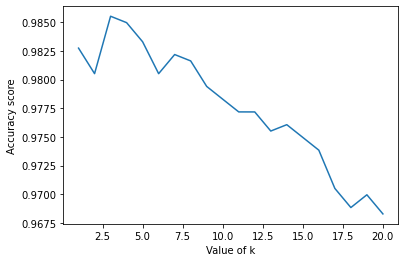

In [14]:
plt.plot(k_list, cross_score)
plt.xlabel("Value of k")
plt.ylabel("Accuracy score")
plt.show()

In [15]:
max(cross_score)

0.9855283345706509

The best accuracy score is obtained with 3 neighbors (k = 3). The accuracy score is 0.986.

### Neural network

Let's see what we can get with an other method: the neural network.
We'll test this method with several amount of neurons.

#### With 1 hidden layer

In [16]:
"""
n: number of neurons in the hidden layer
features: name of the columns used in the training
labels: name of the target column(s)
"""

from sklearn.neural_network import MLPClassifier

def train_neural(n, features, labels, df_tr): # Train a 1 hidden layered neural network
    mlp = MLPClassifier(hidden_layer_sizes=(n,), max_iter = 1000)
    mlp.fit(df_tr[features], df_tr[labels])
    return mlp

def cross_validate_neural(n, data, features, labels, n_splits=4): # Cross validate a 1 hidden layered neural network
    accuracy_list = []
    kf = KFold(n_splits, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_df = data.iloc[train_index].copy()
        test_df = data.iloc[test_index].copy()
        model = train_neural(n, features, labels, train_df)
        score = test(model, features, labels, test_df)
        accuracy_list.append(score)
    return np.mean(accuracy_list)

In [17]:
neurons = [10,16,32,64,128]
neural_score = []
for n in neurons:
    score = cross_validate_neural(n, complete_data, features, labels, 4)
    neural_score.append(score)

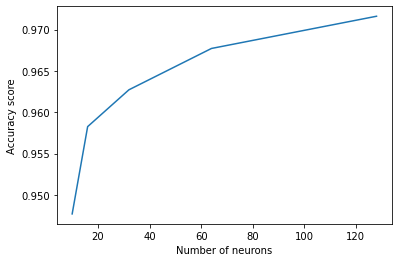

In [18]:
plt.plot(neurons, neural_score)
plt.xlabel("Number of neurons")
plt.ylabel("Accuracy score")
plt.show()

In [19]:
neural_score

[0.9476886909180896,
 0.9582553823311062,
 0.962713437268003,
 0.9677183865379857,
 0.9716184112843357]

The best accuracy score we got with 1 hidden layer is with 128 neurons and it goes to 0.972.

#### With 2 hidden layers

In [20]:
"""
n: number of neurons in the first hidden layer
m: number of neurons in the second hidden layer
features: name of the columns used in the training
labels: name of the target column(s)
"""

def train_neural_2(n, m, features, labels, df_tr): # Train a 2 hidden layered neural network
    mlp = MLPClassifier(hidden_layer_sizes=(n,m), max_iter = 1000)
    mlp.fit(df_tr[features], df_tr[labels])
    return mlp

def cross_validate_neural_2(n, m, data, features, labels, n_splits=4): # Cross validate a 2 hidden layered neural network
    accuracy_list = []
    kf = KFold(n_splits, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_df = data.iloc[train_index].copy()
        test_df = data.iloc[test_index].copy()
        model = train_neural_2(n, m, features, labels, train_df)
        score = test(model, features, labels, test_df)
        accuracy_list.append(score)
    return np.mean(accuracy_list)

In [21]:
layers_score = cross_validate_neural_2(64, 64, complete_data, features, labels, 4)

In [22]:
layers_score

0.9738418708240535

In [23]:
neurons_2 = [10,16,32,64,128]
neural_score_2 = []
for n in neurons_2:
    score = cross_validate_neural_2(n, n, complete_data, features, labels, 4)
    neural_score_2.append(score)

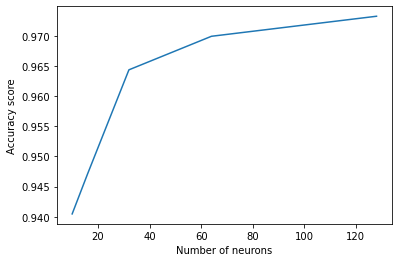

In [24]:
plt.plot(neurons_2, neural_score_2)
plt.xlabel("Number of neurons")
plt.ylabel("Accuracy score")
plt.show()

In [25]:
neural_score_2

[0.9404590447908934,
 0.9471331353625341,
 0.9643850532046523,
 0.9699554565701559,
 0.9732826033160109]

The best accuracy score we got with 2 hidden layers is with 128 neurons per layer, and it goes to 0.973.

#### With 3 hidden layers

In [26]:
"""
n: number of neurons in the first hidden layer
m: number of neurons in the second hidden layer
p: number of neurons in the third hidden layer
features: name of the columns used in the training
labels: name of the target column(s)
"""

def train_neural_3(n, m, p, features, labels, df_tr): # Train a 3 hidden layered neural network
    mlp = MLPClassifier(hidden_layer_sizes=(n,m,p), max_iter = 1000)
    mlp.fit(df_tr[features], df_tr[labels])
    return mlp

def cross_validate_neural_3(n, m, p, data, features, labels, n_splits=4): # Cross validate a 2 hidden layered neural network
    accuracy_list = []
    kf = KFold(n_splits, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_df = data.iloc[train_index].copy()
        test_df = data.iloc[test_index].copy()
        model = train_neural_3(n, m, p, features, labels, train_df)
        score = test(model, features, labels, test_df)
        accuracy_list.append(score)
    return np.mean(accuracy_list)

In [27]:
neurons_3 = [10,16,32,64,128]
neural_score_3 = []

for n in neurons_3:
    score = cross_validate_neural_3(n, n, n, complete_data, features, labels, 4)
    neural_score_3.append(score)

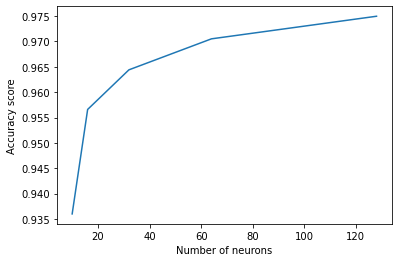

In [28]:
plt.plot(neurons_3, neural_score_3)
plt.xlabel("Number of neurons")
plt.ylabel("Accuracy score")
plt.show()

In [29]:
neural_score_3

[0.9360071764414748,
 0.9565899529819352,
 0.9643924771096264,
 0.9704998762682504,
 0.974951744617669]

The best score we got is 0.975 and is obtained with 3 layers and 128 neurons.


After all this tests, we can say that for a digit classifier using the handwritten digits dataset that is available in Scikit-learn library a k-neighbor model and a neural network with 3 hidden layers and 128 neurons per layer have a similar accuracy even though the k-neighbor model seems slightly more accurate.

_____________

## Neural network from scratch

To get a more complete view of how a neural network works, we'll build one without using sklearn nor any other deep learning library.

To do that, we need to define functions that will train the network.

The functions below are able to train a neural network depending on several parameters to make a digits classifier. With these functions, we are able to choose the number of hidden layers, the number of neurons in the hidden layers, the number of pixels in the images and the number of iterations the training process has to perform.

Here we have an illustration of how the training process operates for a neural network with 1 input layer (A[0] or X), 1 hidden layer (A[1]) and 1 output layer (A[2]).

In the first iteration, we choose random values for the matrices W (the weights) and the matrices b (the bias). Then we perform the following operations:

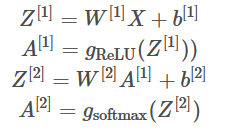

The output layer matrix (A[2]) is a 10x1 matrix. The first row containing the probability of the input image being a 0, the second of it being a 1, up until the last row having the probability of it being a 9.

Then, we check the gap between the real value in the image and our prediction. And we calculate the error for each parameter:

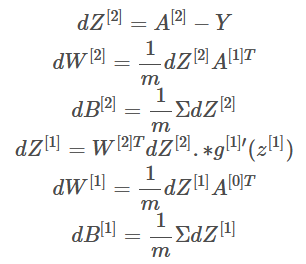

And finally, we update the initial parameters:

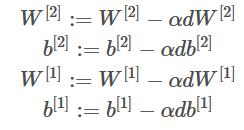

This process is performed again with the updated parameters and must be done until the accuracy value is satisfactory. The number of iterations performed can be chosen by the user.

In [30]:
"""
neurons: number of neurons
size: number of pixel in the digits images
h_layer: number of hidden layers in the neural network
X: input matrix
Y: matrix containing the label of the images in the input (for the training process)
d: dictionnary containing the weight and bias matrices (W and b) for each layer
d_2: dictionnary containing the Z and A matrices for each layer
d_3: dictionnary containing the dZ, dW and db matrices (used for the correction of the model) for each layer
alpha: learning rate
"""
def initialisation(neurons, size, h_layer): # Initialise the weight and bias matrices with random values
    d = {'W1' : np.random.rand(neurons,size) - 0.5, 'b1' : np.random.rand(neurons, 1) - 0.5}
    if h_layer > 1:
        for k in range(2, h_layer + 1):
            d["W{0}".format(k)] = np.random.rand(neurons,neurons) - 0.5
            d["b{0}".format(k)] = np.random.rand(neurons,1) - 0.5  
    d["W{0}".format(h_layer + 1)] = np.random.rand(10,neurons) - 0.5
    d["b{0}".format(h_layer + 1)] = np.random.rand(10,1) - 0.5
    return d

def Relu(Z): # Rectified linear unit function
    return np.maximum(Z, 0)

def softmax(Z): # Softmax function
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def train_1(d, X): # Calculate the Z and A matrices for each layer
    i = int(len(d) / 2 - 1) 
    d_2 = {'Z1' : d['W1'].dot(X) + d['b1']}
    d_2['A1'] = Relu(d_2['Z1'])  
    if i > 1:
        for k in range(2, i + 1):
            d_2["Z{0}".format(k)] = d["W{0}".format(k)].dot(d_2["A{0}".format(k-1)]) + d["b{0}".format(k)]
            d_2["A{0}".format(k)] = Relu(d_2["Z{0}".format(k)])
    d_2["Z{0}".format(i + 1)] = d["W{0}".format(i + 1)].dot(d_2["A{0}".format(i)]) + d["b{0}".format(i + 1)]
    d_2["A{0}".format(i + 1)] = softmax(d_2["Z{0}".format(i + 1)]) 
    return d_2
    
def check_mat(Y): # Adapt the matrix Y containing the labels of the input digits to use it in the training process
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def Relu_deriv(Z): # Derivative of the rectified linear unit function
    return Z > 0

def train_2(d, d_2, X, Y): # Calculate the corrective matrices dZ, dW and db
    m = X.shape[1]
    i = int(len(d) / 2 - 1) 
    one_hot_Y = check_mat(Y)
    d_3 = {}
    d_3["dZ{0}".format(i + 1)] = d_2["A{0}".format(i + 1)] - one_hot_Y
    d_3["dW{0}".format(i + 1)] = 1 / m * d_3["dZ{0}".format(i + 1)].dot(d_2["A{0}".format(i)].T)
    d_3["db{0}".format(i + 1)] = 1 / m *  np.sum(d_3["dZ{0}".format(i + 1)])
    if i > 1:
        for k in range(2, i + 1):
            d_3["dZ{0}".format( i + 2 - k)] =  d["W{0}".format( i + 3 - k)].T.dot(d_3["dZ{0}".format( i + 3 - k)]) * Relu_deriv(d_2["Z{0}".format( i + 2 - k)])
            d_3["dW{0}".format( i + 2 - k)] = 1 / m * d_3["dZ{0}".format(i + 2 - k)].dot(d_2["A{0}".format(i + 1 - k)].T)
            d_3["db{0}".format(i + 2 - k)] = 1 / m *  np.sum(d_3["dZ{0}".format(i + 2 - k)])
    d_3["dZ1"] =  d["W2"].T.dot(d_3["dZ2"]) * Relu_deriv(d_2["Z1"])
    d_3["dW1"] = 1 / m * d_3["dZ1"].dot(X.T)
    d_3["db1"] = 1 / m *  np.sum(d_3["dZ1"])
    return d_3

def update_params(d, d_3, alpha): # Update the weight and bias matrices using the corrective matrices
    d_updated = {}
    for i in range (1, 3):
        d_updated["W{0}".format(i)] = d["W{0}".format(i)] - alpha * d_3["dW{0}".format(i)]
        d_updated["b{0}".format(i)] = d["b{0}".format(i)] - alpha * d_3["db{0}".format(i)]
    return d_updated

In [31]:
def get_predictions(d_2): # Get the prediction
    i = int(len(d_2) / 2 - 1) 
    output_layer = 'A' + str(i + 1)
    return np.argmax(d_2[output_layer], 0)

def get_accuracy(predictions, Y): # Compare the prediction with the actual values to get the accuracy score
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Apply the training process of the network and return the weight and bias matrices for each layer of the trained neural network
def gradient_descent(X, Y, alpha, iterations, neurons, size, h_layer): 
    d = initialisation(neurons, size, h_layer)
    d_2 = train_1(d, X)
    d_3 = train_2(d, d_2, X, Y)
    for i in range(1, 1 + iterations):
        d.update(update_params(d, d_3, alpha))
        d_2.update(train_1(d, X))
        d_3.update(train_2(d, d_2, X, Y))
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(d_2)
            print(get_accuracy(predictions, Y))
    return d

In [32]:
def make_predictions(d, X): # Using the trained network weight and bias matrices, return a prediction of an input image(s)
    d_2 = train_1(d, X)
    predictions = get_predictions(d_2)
    return predictions

def test_prediction(index, d, X, Y, s): # Check and plot the prediction
    current_image = X[:, index, None]
    prediction = make_predictions(d, X[:, index, None])
    label = Y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    size = int(np.sqrt(s))
    current_image = current_image.reshape((size, size)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Now that all the functions are finnished, we can apply them and build our neural network.

We first need to adapt our dataset as our functions only take arrays as an input, we also need to transpose the dataset array.
We divide our input into 2 dataframe/arrays, one for training and one for testing.

In [33]:
data_digits = pd.DataFrame(data) / 16
data_digits['target'] = target

from sklearn.model_selection import train_test_split

training,testing = train_test_split(data_digits,test_size = 0.2,random_state = 15)

features = list(data_digits.columns)
features = features[:-1]
labels = 'target'

training_X = np.array(training.drop(labels, axis = 1)).T
training_Y = np.array(training[labels]).T
testing_X = np.array(testing.drop(labels, axis = 1)).T
testing_Y = np.array(testing[labels]).T

Now, we calculate d which is the dictionnary containing the weight and bias matrices (W and b) for each layer of our neural network.

In [34]:
d = gradient_descent(training_X, training_Y, 0.1, 500, 128, 64, 3)

Iteration:  10
[4 4 6 ... 4 6 4] [6 4 3 ... 8 8 6]
0.3771746694502436
...
Iteration:  500
[6 4 3 ... 8 8 6] [6 4 3 ... 8 8 6]
1.0


Let's test our result with a few images from the testing set.

Prediction:  [9]
Label:  9


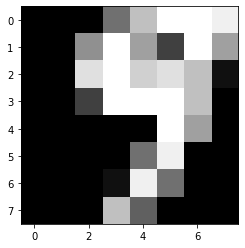

Prediction:  [4]
Label:  4


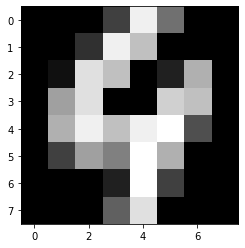

Prediction:  [4]
Label:  4


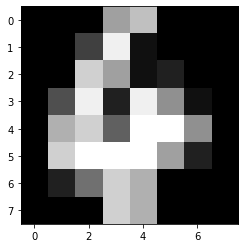

Prediction:  [1]
Label:  1


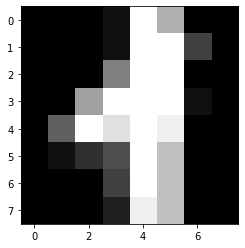

In [35]:
test_prediction(0, d, testing_X, testing_Y, 64)
test_prediction(1, d, testing_X, testing_Y, 64)
test_prediction(2, d, testing_X, testing_Y, 64)
test_prediction(3, d, testing_X, testing_Y, 64)

It looks like it is working properly.

Now, we'll make te predictions for the whole testing set, and calculate the accuracy of our model.

In [36]:
dev_predictions = make_predictions(d, testing_X)
get_accuracy(dev_predictions, testing_Y)

[9 4 4 1 2 6 4 2 5 1 5 6 8 6 6 6 4 0 1 3 3 5 2 6 7 5 4 3 7 3 9 0 4 6 7 7 1
 8 7 9 8 0 4 9 3 8 7 6 7 2 8 9 3 1 2 8 6 4 1 4 2 9 5 0 9 5 6 2 4 4 6 4 9 0
 0 3 2 4 4 5 2 7 1 6 3 1 3 1 2 0 7 2 5 0 5 2 9 2 9 7 0 1 0 1 6 3 8 8 2 7 8
 3 9 7 1 3 4 6 0 6 9 6 5 1 2 9 2 5 0 6 8 1 2 4 7 6 4 7 7 9 6 5 9 2 1 6 6 6
 0 0 3 5 1 8 7 1 8 4 1 6 8 8 8 9 2 4 0 5 5 0 3 2 5 4 8 4 1 2 0 7 9 7 4 1 8
 0 8 4 5 1 9 6 8 2 5 6 6 5 2 5 7 6 5 0 5 2 8 3 4 8 1 4 2 4 1 0 7 3 4 8 8 9
 1 2 4 4 4 1 2 6 9 1 9 2 1 6 6 4 4 9 9 1 0 6 5 9 4 5 7 0 9 5 2 7 9 5 9 9 5
 0 7 9 7 6 2 5 5 8 7 8 7 6 2 2 1 5 7 1 1 1 3 0 2 3 1 7 6 2 6 9 5 3 7 9 3 8
 5 0 5 3 3 6 4 9 8 9 2 1 9 9 0 8 7 1 0 1 1 4 4 0 6 1 7 0 6 5 0 8 1 9 8 9 3
 2 4 4 9 3 0 1 3 4 0 0 5 1 1 9 7 8 1 0 8 7 3 2 7 9 3 7] [9 4 4 1 2 6 4 2 5 1 5 6 8 6 6 6 4 6 1 3 3 5 2 6 7 5 4 3 7 3 9 0 4 6 8 7 1
 8 7 9 8 0 4 9 3 8 7 6 7 2 8 9 3 1 2 8 6 4 8 4 2 9 5 0 9 5 8 3 4 4 6 4 9 0
 0 3 2 4 4 5 2 7 1 6 3 1 3 1 2 0 7 2 5 0 5 2 9 2 9 7 0 1 0 1 6 3 8 8 2 7 8
 3 9 7 1 3 4 6 0 6 9 6 5 1 2 9 2 5 0 6 8 8 2

0.9583333333333334

Using the same parameters as with the best neural network found with sklearn (3 hidden layers with 128 neurons) let's make a cross validation to see which model (the sklearn or the one made from scratch) is the most accurate.

In [37]:
def cross_validate_scratch(n, s, h, data, features, labels, n_splits=4):
    accuracy_list = []
    kf = KFold(n_splits, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_df = data.iloc[train_index].copy()
        train_x = np.array(train_df.drop(labels, axis = 1)).T
        train_y = np.array(train_df[labels]).T
        test_df = data.iloc[test_index].copy()
        test_x = np.array(test_df.drop(labels, axis = 1)).T
        test_y = np.array(test_df[labels]).T
        d = gradient_descent(train_x, train_y, 0.1, 500, n, s, h)
        predictions = make_predictions(d, test_x)
        score = accuracy_score(test_y, predictions)
        accuracy_list.append(score)
    return np.mean(accuracy_list)

In [38]:
data_digits = pd.DataFrame(data) / 16
data_digits['target'] = target



features = list(data_digits.columns)
features = features[:-1]
labels = 'target'

cross_validate_scratch(128, 64, 3, data_digits, features, labels, 4)

Iteration:  10
[5 3 5 ... 5 5 3] [1 2 4 ... 0 9 8]
0.19302152932442465
...
Iteration:  160
[6 3 6 ... 8 5 8] [0 3 6 ... 8 9 8]
0.5007418397626113


Iteration:  170
[6 3 6 ... 8 5 8] [0 3 6 ... 8 9 8]
0.5341246290801187
...
Iteration:  500
[0 1 2 ... 8 8 8] [0 1 2 ... 8 8 8]
0.9992581602373887


0.9460121257114575

With sklearn, we get an accuracy score of 0.976 and with the model from scratch we get 0.954.

There are some progress to make with the algorithm made from scratch but we still get a quite excellent result.

________________________________________________________________________________________________________________________________

### Kaggle dataset


Let's try using another dataset. We'll use one from Kaggle website (https://www.kaggle.com/competitions/digit-recognizer).
This dataset contains bigger images for the digits, instead of having dimensions of 8x8, we have here dimensions of 64x64. Furthermore, the scale of value in the pixel is between 0 to 255.

In [39]:
dataz = pd.read_csv('train_digits.csv')
dataz = np.array(dataz)
m, n = dataz.shape
np.random.shuffle(dataz) # shuffle before splitting into dev and training sets

data_dev = dataz[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = dataz[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

We'll train a network with 3 hidden layers and 128 neurons per hidden layer.

In [40]:
d_k = gradient_descent(X_train, Y_train, 0.1, 500, 128, 784, 3)

Iteration:  10
[6 9 0 ... 5 6 9] [7 8 0 ... 0 7 4]
0.2575121951219512
...
Iteration:  500
[7 1 0 ... 0 7 4] [7 8 0 ... 0 7 4]
0.8826585365853659


We got an accuracy score of 0.88 for the training set. 

In [41]:
data_kaggle = pd.read_csv('train_digits.csv')
features = list(data_kaggle.columns)[1:]
labels = 'label'
data_kaggle[features] = data_kaggle[features] / 255

In [42]:
cross_validate_scratch(128, 784, 3, data_kaggle, features, labels, 4)

Iteration:  10
...
Iteration:  160
[1 1 4 ... 1 6 4] [1 1 4 ... 1 6 9]
0.7685396825396825


Iteration:  170
[1 1 4 ... 1 6 4] [1 1 4 ... 1 6 9]
...
Iteration:  500
[1 0 1 ... 0 1 7] [1 0 1 ... 0 1 7]
0.8451746031746031


0.8502380952380952

The cross validation gives us an accuracy score of 0.85

Prediction:  [1]
Label:  1


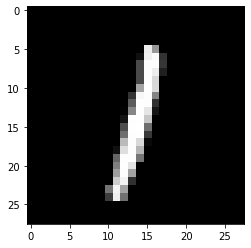

Prediction:  [6]
Label:  6


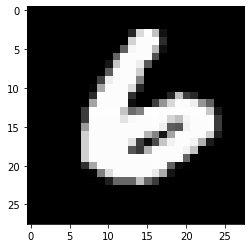

Prediction:  [0]
Label:  0


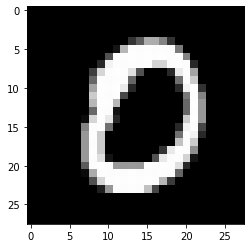

Prediction:  [9]
Label:  9


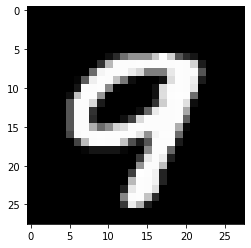

In [45]:
test_prediction(0, d_k, X_dev, Y_dev, 784)
test_prediction(10, d_k, X_dev, Y_dev, 784)
test_prediction(20, d_k, X_dev, Y_dev, 784)
test_prediction(30, d_k, X_dev, Y_dev, 784)

As we can see above, the predictions seems to properly work.

In [46]:
dev_predictions = make_predictions(d_k, X_dev)
get_accuracy(dev_predictions, Y_dev)

[1 1 5 1 9 4 1 5 7 2 6 0 1 3 3 8 4 7 3 7 0 2 7 1 9 3 0 0 1 4 9 0 1 0 2 1 0
 0 1 3 3 9 6 4 0 2 7 0 0 5 8 2 1 1 2 8 8 5 5 0 4 0 5 0 9 2 7 6 7 9 1 8 3 4
 7 1 4 2 0 6 7 5 5 0 0 4 2 7 2 8 7 9 1 2 0 7 5 9 6 1 1 6 0 9 4 8 2 9 6 8 9
 6 4 1 9 9 3 7 5 8 6 3 9 2 2 4 9 3 8 3 1 0 6 1 5 3 4 9 8 1 6 9 6 0 9 2 6 7
 2 1 8 7 5 0 3 4 4 1 8 5 9 3 0 3 4 0 0 6 9 8 1 3 0 1 2 7 3 2 1 3 4 3 6 7 8
 6 8 1 8 8 0 3 8 9 2 1 6 3 2 0 8 2 3 1 2 4 9 9 6 1 5 1 4 9 7 7 6 7 6 7 7 3
 5 2 4 2 7 2 1 2 7 5 5 8 4 5 0 0 8 1 0 9 8 5 0 2 4 7 2 3 5 9 5 7 2 7 4 1 6
 8 0 6 0 0 7 8 0 1 1 5 9 5 8 1 6 2 3 2 3 0 1 1 5 7 7 7 0 7 4 1 9 7 6 1 5 3
 5 5 3 5 5 4 7 3 8 0 9 9 8 2 3 5 2 2 5 1 0 4 1 7 9 6 2 4 9 9 9 9 7 2 8 3 3
 2 8 3 0 2 0 6 3 7 0 0 0 1 5 1 7 7 0 9 3 8 5 0 0 1 3 6 6 6 1 4 2 7 6 5 0 4
 1 1 7 2 9 8 5 6 2 6 8 2 0 5 2 9 0 6 6 9 5 0 9 7 5 0 0 2 8 7 1 3 7 7 4 6 6
 8 7 8 0 8 6 0 2 7 6 5 3 5 1 1 0 8 7 8 8 6 2 4 0 5 4 0 1 3 8 8 2 6 3 6 5 4
 9 7 8 8 3 4 9 9 3 6 2 7 7 2 1 8 1 9 2 2 9 0 0 0 2 8 1 5 2 5 9 2 7 8 2 8 9
 9 6 1 1 5 3 8 1 0 1 9 1 

0.876

We get an accuracy score of 0.876 with the testing set.

We can see that the accuracy score is lower with the Kaggle dataset, but it is understandable as the pictures are bigger and as a result, the task is more complicated.